In [1]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import numpy as np
from glob import glob

from tensorflow.keras.models import load_model
from annsa.template_sampling import rebin_spectrum
from annsa.annsa import read_spectrum
from annsa.load_pretrained_network import load_features


## Load Models

In [2]:
all_models = {}

model_classes = [
    'dnn',
    'cnn',
    'daednn',
    'caednn',
]


for mode in ['easy', 'full']:
    for model_class in model_classes:
        print(model_class + ' ' + mode + '...')
        temp_models = []
        for i in range(5):
            i = str(i)

            temp_model = load_model(
                os.path.join(
                'final-models-keras',
                model_class+'-keras-'+mode+'_fold'+i+'.hdf5',),
                compile=False,
            )
            temp_models.append(temp_model)
        all_models[model_class+'-'+mode] = temp_models

scalers = {}
model_classes = ['dnn', 'cnn',]
for mode in ['easy', 'full']:
    for model_class in model_classes:
        architecture_id = os.path.join('..',
                                       'source-interdiction',
                                       'final_training_notebooks',
                                       'final-models',
                                       'learningcurve-'+model_class+'-'+mode+'-final-features',)
        model_features = load_features(architecture_id)
        scalers[model_class+'-'+mode] = model_features.scaler.transform
        if model_class == 'dnn':
            scalers['daednn'+'-'+mode] = model_features.scaler.transform
        if model_class == 'cnn':
            scalers['caednn'+'-'+mode] = model_features.scaler.transform


dnn easy...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
cnn easy...
daednn easy...
caednn easy...
dnn full...
cnn full...
daednn full...
caednn full...


Using TensorFlow backend.


## Test network

In [3]:
def models_bagged(all_models, model_id, spectra):
    scaler = scalers[model_id]
    members = all_models[model_id]
    
    # scale inputs
    spectra_scaled = scaler(spectra)
    # make predictions
    yhats = [model.predict(spectra_scaled) for model in members]
    yhats = np.array(yhats)
    # average across ensemble members
    member_average = np.mean(yhats, axis=1)
    # average across classes
    average = np.mean(member_average, axis=0)
    return average, yhats.flatten()

In [4]:
def plot_spectrum(spectrum):
    
    plt.figure(figsize=(10,3))
    plt.semilogy(np.linspace(0,3000,1024), spectrum)
    plt.ylim(1, 2.5*np.max(spectrum))

# RF shells

In [5]:
RF_spec = []

# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-750V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-750V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-760V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-760V/10s_TEST_number_00*.Spe'):
for filename in glob('./rocky_flats_spectra/RFshells-760V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandTungsten-740V/5s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandTungsten-740V/10s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandTungsten-740V/30s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-750V/5s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-750V/10s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-750V/30s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-760V/5s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-760V/10s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-760V/30s_TEST_number_00*'):

    tmp_spectrum = read_spectrum(filename)
    tmp_spectrum_recal = rebin_spectrum(tmp_spectrum, 0, 0.85, 0)
    RF_spec.append(tmp_spectrum_recal)

RF_spec_cumsum = np.cumsum(RF_spec, axis = 0)
test_spec = RF_spec_cumsum[-1]


spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
dnn-easy
0.5921383 +/- 0.006274543 

cnn-easy
0.76161194 +/- 0.0027474605 

daednn-easy
0.5989453 +/- 0.00063440774 

caednn-easy
0.78372264 +/- 0.0059923744 

dnn-full
0.88947755 +/- 0.0007862868 

cnn-full
0.76805514 +/- 0.00018415568 

daednn-full
0.90494144 +/- 0.0028292423 

caednn-full
0.7964181 +/- 0.0032911047 



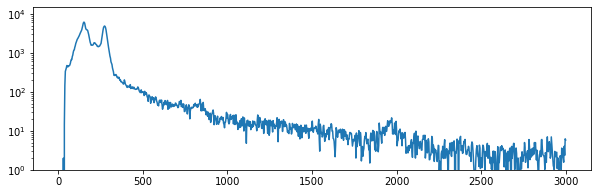

In [6]:
RF_spec = []

# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-750V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-750V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-760V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-760V/10s_TEST_number_00*.Spe'):
for filename in glob('./rocky_flats_spectra/RFshells-760V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandTungsten-740V/5s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandTungsten-740V/10s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandTungsten-740V/30s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-750V/5s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-750V/10s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-750V/30s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-760V/5s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-760V/10s_TEST_number_00*'):
# for filename in glob.glob('./rocky_flats_spectra/RFshellsandIron-760V/30s_TEST_number_00*'):

    tmp_spectrum = read_spectrum(filename)
    tmp_spectrum_recal = rebin_spectrum(tmp_spectrum, 0, 0.85, 0)
    RF_spec.append(tmp_spectrum_recal)

RF_spec_cumsum = np.cumsum(RF_spec, axis = 0)
test_spec = RF_spec_cumsum[-1]

# test_spec = read_spectrum('./rocky_flats_spectra/RFshells-760V/30s_TEST_number_001.Spe')
# test_spec = rebin_spectrum(test_spec, 0, 0.85, 0)
plot_spectrum(test_spec)

for model_id in all_models:
    print(model_id)
    _, output = models_bagged(all_models,
                  model_id=model_id,
                  spectra=[test_spec])
    print(np.average(output),'+/-',np.var(output),'\n')
    
    


### Depleted Uranium

spe in unknown encoding
dnn-easy
0.2748496 +/- 0.019621056 

cnn-easy
0.032928683 +/- 1.10046185e-05 

daednn-easy
0.074937955 +/- 0.022395495 

caednn-easy
0.090242766 +/- 7.0732726e-06 

dnn-full
2.9165795e-07 +/- 2.7345254e-13 

cnn-full
0.075548105 +/- 0.0003366128 

daednn-full
1.3023326e-05 +/- 3.636323e-10 

caednn-full
0.036895525 +/- 6.476358e-05 



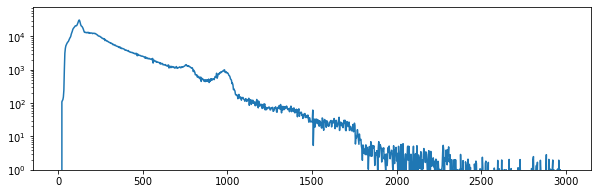

In [7]:
test_spec = read_spectrum('test_DU.spe')
test_spec_rebin = rebin_spectrum(test_spec, 0, 0.99, 0)
plot_spectrum(test_spec_rebin)

for model_id in all_models:
    print(model_id)
    _, output = models_bagged(all_models,
                  model_id=model_id,
                  spectra=[test_spec_rebin])
    print(np.average(output),'+/-',np.var(output),'\n')
    

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Script for reading a Canberra Nuclear File (CNF) form GENIE2000 software.
It can be used as a stand alone script or as a module.
Optionally, it generates a text file with the relevant information read from the CNF file. The output file name is the input file plus the '.txt' extension.
Examples
--------
    >>> python read_cnf.py name_of_the_file.CNF
    ('name_of_the_file.CNF.txt' is automatically created)
References
----------
This script was made as a copy of the c program 'cnfconv' written for the same porpouse. That software can be found here: 
https://github.com/messlinger/cnfconv
All the information of the binary file encoding was taken from the file 'cnf_file_format.txt' of the above repository.
"""

import sys
import numpy as np
import time 
import struct


def read_cnf_file(filename,write_output=False):
    """
    Reads data of a Canberra Nuclear File used by the Genie2000 software.
    Parameters
    ----------
    filename : string
        Name of the file to be read.
    write_output : boolean, optional
        Indicate weather to write an output file or not.
    
    Returns
    -------
    read_dic : dictionary
        Dictionary with all the magnitudes read. Depending on the data available, the dictionaries keys may change. Some possible keys are:
        Sample id
        Channels
        Sample unit
        Sample name
        Channels data
        Energy unit
        Energy coefficients
        Left marker
        Total counts
        Number of channels
        Start time
        Counts in markers
        Right marker
        Sample type
        Sample description
        User name
        Live time
        Energy
        Real time
        Measurement mode   
        MCA type
        Data source
    Examples
    --------
        >>> from read_cnf import lee_cnf_file
        >>> read_dic = read_cnf_file('name_of_the_file.CNF')
        >>> read_dic['Live time']
    TODO
    ----
    - Markers information is not being read correctly.
    - If the CNF file are obtained in a MCA mode, the live and real time are not read correctly.
    - Additional data must be read in case of a file from MCA mode (mainly dwell time).
    """

    # Name of the output file
    out_filename = filename + '.txt'
    
    # Dictionary with all the information read
    read_dic = {} 
    with open(filename,'rb') as f:
        i = 0
        while True:
            # List of available section headers
            sec_header = 0x70 + i*0x30
            i+=1
            # Section id in header
            sec_id_header = uint32_at(f,sec_header)
            
            # End of section list
            if sec_id_header==0x00: break
           
            # Location of the begining of each sections
            sec_loc = uint32_at(f,sec_header+0x0a)
            # Known section id's:
            # Parameter section (times, energy calibration, etc)
            if sec_id_header==0x00012000:
                offs_param = sec_loc 
                read_dic.update(get_energy_calibration(f,offs_param))
                read_dic.update(get_date_time(f,offs_param))
            # String section
            elif sec_id_header==0x00012001:
                offs_str = sec_loc 
                read_dic.update(get_strings(f,offs_str))
            # Marker section
            elif sec_id_header==0x00012004:
                offs_mark = sec_loc
                read_dic.update(get_markers(f,offs_mark))
            # Channel data section
            elif sec_id_header==0x00012005:
                offs_chan = sec_loc
                read_dic.update(get_channel_data(f,offs_param,offs_chan))
            else: continue

            # For known sections: section header ir repeated in section block
            if (sec_id_header != uint32_at(f,sec_loc)):
                print('File {}: Format error\n'.format(filename))
        
    # Once the file is read, some derived magnitudes can be obtained

    # Convert channels to energy
    if set(('Channels','Energy coefficients')) <= set(read_dic):
        read_dic.update(chan_to_energy(read_dic))

    # Compute ingegration between markers 
    if set(('Channels','Left marker')) <= set(read_dic):
        read_dic.update(markers_integration(read_dic))

    print(50*'=')
    print(10*' '+'File '+str(filename)+' succesfully read!'+ 10*' ')
    print(50*'=')
     
    # If true, writes an text output file
    if write_output: write_to_file(out_filename,read_dic)

    return read_dic

##########################################################
# Definitions for reading some data types 
##########################################################

def uint8_at(f,pos):
    f.seek(pos)
    return np.fromfile(f,dtype=np.dtype('<u1'),count=1)[0]
def uint16_at(f,pos):
    f.seek(pos)
    return np.fromfile(f,dtype=np.dtype('<u2'),count=1)[0]
def uint32_at(f,pos):
    f.seek(pos)
    return np.fromfile(f,dtype=np.dtype('<u4'),count=1)[0]
def uint64_at(f,pos):
    f.seek(pos)
    return np.fromfile(f,dtype=np.dtype('<u8'),count=1)[0]
def pdp11f_at(f,pos):
    """
    Convert PDP11 32bit floating point format to
    IEE 754 single precision (32bits)
    """
    f.seek(pos)
    # Read two int16 numbers
    tmp16 = np.fromfile(f,dtype=np.dtype('<u2'),count=2)
    # Swapp positions
    mypack =  struct.pack('HH',tmp16[1],tmp16[0])
    f = struct.unpack('f',mypack)[0]/4.0
    return f
def time_at(f,pos):
    return ~uint64_at(f,pos)*1e-7
def datetime_at(f,pos):
    return uint64_at(f,pos) / 10000000 - 3506716800
def string_at(f,pos,length):
    f.seek(pos)
    # In order to avoid characters with not utf8 encoding
    return f.read(length).decode('utf8').rstrip('\00').rstrip()

###########################################################
# Definitions for locating and reading data inside the file
###########################################################

def get_strings(f,offs_str):
    """Read strings section."""
    
    sample_name = string_at(f,offs_str + 0x0030, 0x40)
    sample_id   = string_at(f,offs_str + 0x0070, 0x10)
    #sample_id   = string_at(f,offs_str + 0x0070, 0x40)
    sample_type = string_at(f,offs_str + 0x00b0, 0x10)
    sample_unit = string_at(f,offs_str + 0x00c4, 0x40)
    user_name   = string_at(f,offs_str + 0x02d6, 0x18)
    sample_desc = string_at(f,offs_str + 0x036e, 0x100)
        
    out_dic = {
               'Sample name': sample_name,
               'Sample id': sample_id,
               'Sample type': sample_type,
               'Sample unit': sample_unit,
               'User name': user_name,
               'Sample description': sample_desc
              }

    return out_dic

def get_energy_calibration(f,offs_param):
    """Read energy calibration coefficients."""
    
    offs_calib = offs_param + 0x30 + uint16_at(f, offs_param + 0x22)
    A = np.empty(4)
    A[0] = pdp11f_at(f, offs_calib + 0x44)
    A[1] = pdp11f_at(f, offs_calib + 0x48)
    A[2] = pdp11f_at(f, offs_calib + 0x4c)
    A[3] = pdp11f_at(f, offs_calib + 0x50)

    # Assuming a maximum length of 0x11 for the energy unit
    energy_unit = string_at(f,offs_calib + 0x5c,0x11)

    # MCA type
    MCA_type = string_at(f,offs_calib + 0x9c,0x10)
    
    # Data source
    data_source = string_at(f,offs_calib + 0x108,0x10)

    out_dic = { 'Energy coefficients': A,
                'Energy unit': energy_unit,
                'MCA type': MCA_type,
                'Data source': data_source
              }
    
    return out_dic

def get_channel_data(f,offs_param,offs_chan):
    """Read channel data."""
    
    # Total number of channels
    n_channels = uint8_at(f, offs_param + 0x00ba) * 256
    # Data in each channel
    f.seek(offs_chan + 0x200)
    chan_data = np.fromfile(f,dtype='<u4',count=n_channels)
    # Total counts of the channels
    total_counts = np.sum(chan_data)
    # Measurement mode
    meas_mode = string_at(f,offs_param + 0xb0,0x03)

    # Create array with the correct channel numbering
    channels = np.arange(1,n_channels+1,1)
    
    out_dic = {'Number of channels': n_channels,
               'Channels data': chan_data,
               'Channels': channels,
               'Total counts': total_counts,
               'Measurement mode': meas_mode
              }

    return out_dic

def get_date_time(f,offs_param):
    """Read date and time."""
    
    offs_times = offs_param + 0x30 + uint16_at(f,offs_param + 0x24)
    
    start_time = datetime_at(f,offs_times + 0x01)
    real_time = time_at(f,offs_times + 0x09)
    live_time = time_at(f,offs_times + 0x11)
    
    # Convert to formated date and time
    start_time_str = time.strftime('%d-%m-%Y, %H:%M:%S',time.gmtime(start_time))
        
    out_dic = { 'Real time': real_time,
                'Live time': live_time,
                'Start time': start_time_str
              }
    return out_dic

def get_markers(f,offs_mark):
    """Read left and right markers."""
    
    # TODO: not working properly
    marker_left  = uint32_at(f,offs_mark + 0x007a)
    marker_right = uint32_at(f,offs_mark + 0x008a)

  
    out_dic = {'Left marker': marker_left,
               'Right marker': marker_right,
              }

    return out_dic

def chan_to_energy(dic):
    """ Convert channels to energy using energy calibration coefficients."""

    A = dic['Energy coefficients']
    ch= dic['Channels']
    energy = A[0] + A[1]*ch + A[2]*ch*ch + A[3]*ch*ch*ch

    out_dic = {'Energy': energy}
 
    return  out_dic

def markers_integration(dic):
    # Count between left and right markers
    # TODO: check integral counts limits
    chan_data = dic['Channels data']
    l_marker = dic['Left marker']
    r_marker = dic['Right marker']
    marker_counts = np.sum(chan_data[l_marker-1:r_marker-1])
   
    out_dic = {'Counts in markers': marker_counts}

    return out_dic

###########################################################
# Format of the output text file
###########################################################

def write_to_file(filename,dic):
    """Write data to a text file."""
    
    with open(filename,'w') as f: 
        f.write('#\n')
        f.write('# Sample name: {}\n'.format(dic['Sample name']))
        f.write('\n')
        
        f.write('# Sample id: {}\n'.format(dic['Sample id']))
        f.write('# Sample type: {}\n'.format(dic['Sample type']))
        f.write('# User name: {}\n'.format(dic['User name']))
        f.write('# Sample description: {}\n'.format(dic['Sample description']))
        f.write('#\n')
        
        f.write('# Start time: {}\n'.format(dic['Start time']))
        f.write('# Real time (s): {:.3f}\n'.format(dic['Real time']))
        f.write('# Live time (s): {:.3f}\n'.format(dic['Live time']))
        f.write('#\n')
       
        f.write('# Total counts: {}\n'.format(dic['Total counts']))
        f.write('#\n')
       
        f.write('# Left marker: {}\n'.format(dic['Left marker']))
        f.write('# Right marker: {}\n'.format(dic['Right marker']))
        f.write('# Counts: {}\n'.format(dic['Counts in markers']))
        f.write('#\n')
        
        f.write('# Energy calibration coefficients (E = sum(Ai * n**i))\n')
        for j,co in enumerate(dic['Energy coefficients']):
            f.write('#    A{} = {:.6e}\n'.format(j,co))
        f.write('# Energy unit: {}\n'.format(dic['Energy unit']))
        f.write('#\n')
        
        f.write('# Channel data\n')
        f.write('#     n     energy({})     counts     rate(1/s)\n'.format(dic['Energy unit']))
        f.write('#'+50*'-'+'\n')
        for i,j,k in zip(dic['Channels'],dic['Energy'],dic['Channels data']):
            f.write('{:4d}\t{:.3e}\t{}\t{:.3e}\n'.format(i,j,k,k/dic['Live time']))



            
            

In [9]:
def plot_measured_enrichment_guess(all_outputs,
                                   input_spectra_dict,
                                   calibration_dict,
                                   scale=1.0,
                                   addition=0.001,
                                   calibration=[0,1,0],
                                   ):

    
    
    tmp_spec = rebin_spectrum(spectrum, 0, 1.245, 0)
    tmp_spec = rebin_spectrum(tmp_spec, *calibration)
    all_spectra[true_enrichment] = tmp_spec

    for model_id in all_models:
        print(model_id)
        _, output = models_bagged(all_models,
                      model_id=model_id,
                      spectra=[scale*tmp_spec+addition])
        print(np.average(output),'+/-',np.var(output),'\n')
        all_outputs[model_id].append([true_enrichment, np.average(output), np.var(output)])

    all_spectra = {}


In [10]:
scale = 1.0
addition = 0.001

In [71]:
calibration = [0,1.2,0]

In [72]:
all_spectra = {}

In [73]:
model_id

'daednn-full'

In [74]:
all_outputs = {}

for model_id in all_models:
    all_outputs[model_id] = []

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
dnn-easy
0.5513171 +/- 0.0038989722 

cnn-easy
0.69656 +/- 0.00030166568 

daednn-easy
0.5920565 +/- 0.0008041626 

caednn-easy
0.73559684 +/- 0.00559167 

dnn-full
0.60829043 +/- 0.0019922175 

cnn-full
0.63676465 +/- 0.008477192 

daednn-full
0.6396097 +/- 0.0021874653 

caednn-full
0.6511389 +/- 0.0012388347 



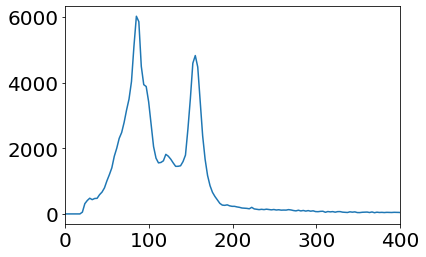

In [75]:
true_enrichment = 0.931


RF_spec = []

# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-740V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-750V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-750V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-760V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-760V/10s_TEST_number_00*.Spe'):
for filename in glob('./rocky_flats_spectra/RFshells-760V/30s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/5s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/10s_TEST_number_00*.Spe'):
# for filename in glob.glob('./rocky_flats_spectra/RFshells-770V/30s_TEST_number_00*.Spe'):
    tmp_spectrum = read_spectrum(filename)
#     tmp_spectrum = rebin_spectrum(tmp_spectrum, 0, 1.0, 0)
    RF_spec.append(tmp_spectrum)

RF_spec_cumsum = np.cumsum(RF_spec, axis = 0)
spectrum = RF_spec_cumsum[-1]
tmp_spec = rebin_spectrum(spectrum, 0, 1.245, 0)
tmp_spec = rebin_spectrum(tmp_spec, *calibration)


all_spectra[true_enrichment] = tmp_spec
plt.figure()
plt.plot(np.linspace(0,3e3,1024), tmp_spec)
plt.xlim([0, 400])

for model_id in all_models:
    print(model_id)
    _, output = models_bagged(all_models,
                  model_id=model_id,
                  spectra=[scale*tmp_spec+addition])
    print(np.average(output),'+/-',np.var(output),'\n')
    all_outputs[model_id].append([true_enrichment, np.average(output), np.var(output)])

(0, 400)

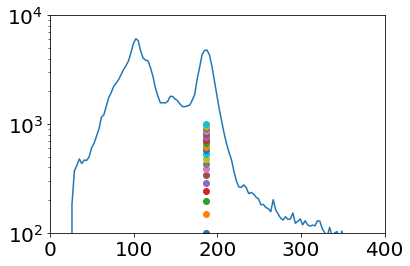

In [76]:
tmp_spec = rebin_spectrum(spectrum, 0, 1.245, 0)

plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)

for thing in np.linspace(1e2,1e3,20):
    plt.scatter(186,thing)
plt.ylim([1e2,1e4])
plt.xlim(0,400)

          File NaI_spectra_uranium/TL-NaI-NU.CNF succesfully read!          
dnn-easy
0.3691787 +/- 0.0038247458 

cnn-easy
0.03349481 +/- 1.6018379e-05 

daednn-easy
0.13458076 +/- 0.014643483 

caednn-easy
0.090636335 +/- 6.017827e-05 

dnn-full
0.009434828 +/- 5.1799823e-05 

cnn-full
0.088857874 +/- 0.0007441013 

daednn-full
0.029276535 +/- 0.00018122965 

caednn-full
0.03538082 +/- 4.4400444e-05 



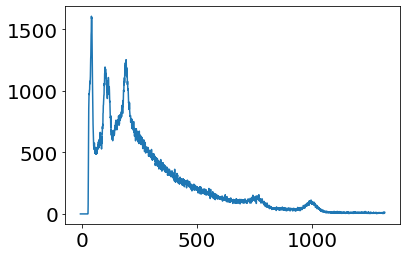

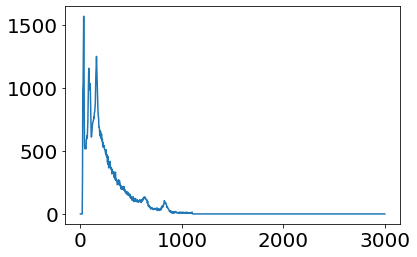

In [77]:
fileName = 'NaI_spectra_uranium/TL-NaI-NU.CNF'
true_enrichment = 0.0007
    
    
data = read_cnf_file(fileName)

channels = data['Channels data']
energy = data['Energy']
spectrum = data['Channels data']

plt.figure()
plt.plot(energy, spectrum)


# tmp_spec = rebin_spectrum(spectrum,0,4.8,0)
tmp_spec = rebin_spectrum(spectrum, 15, 4.5, 0)
tmp_spec = rebin_spectrum(tmp_spec, *calibration)
plt.figure()
plt.plot(np.linspace(0,3e3,1024), tmp_spec)

all_spectra[true_enrichment] = tmp_spec
for model_id in all_models:
    print(model_id)
    _, output = models_bagged(all_models,
                  model_id=model_id,
                  spectra=[scale*tmp_spec+addition])
    print(np.average(output),'+/-',np.var(output),'\n')
    all_outputs[model_id].append([true_enrichment, np.average(output), np.var(output)])

(800, 1200)

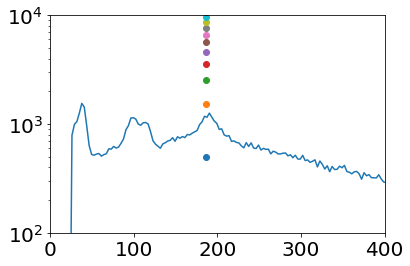

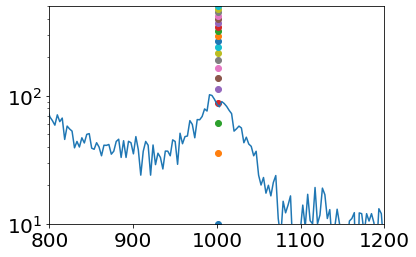

In [78]:
tmp_spec = rebin_spectrum(spectrum, 15, 4.5, 0)
plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)
for thing in np.linspace(5e2,2e4,20):
    plt.scatter(186,thing)
plt.ylim([1e2,1e4])
plt.xlim(0,400)

plt.figure()
plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)
for thing in np.linspace(1e1,5e2,20):
    plt.scatter(1001,thing)
plt.ylim([1e1,5e2])
plt.xlim(800,1200)


          File NaI_spectra_uranium/UISO-27.CNF succesfully read!          
dnn-easy
0.67510974 +/- 0.0210088 

cnn-easy
0.38922325 +/- 0.0043127732 

daednn-easy
0.5910341 +/- 0.0012419302 

caednn-easy
0.34729224 +/- 0.0031516931 

dnn-full
0.089217946 +/- 0.0032151795 

cnn-full
0.44853163 +/- 0.00458479 

daednn-full
0.15887679 +/- 0.028889522 

caednn-full
0.35301107 +/- 0.00134667 



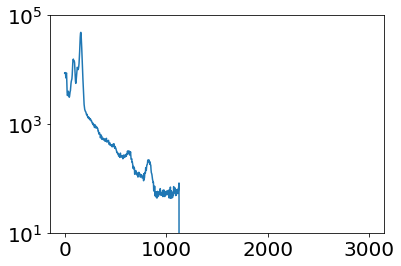

In [79]:
fileName = 'NaI_spectra_uranium/UISO-27.CNF'
true_enrichment = 0.271

data = read_cnf_file(fileName)

channels = data['Channels data']
energy = data['Energy']
spectrum = data['Channels data']

# plt.plot(energy, spectrum)
# plt.semilogy()


tmp_spec = rebin_spectrum(spectrum, 15, 4.4, 0)
tmp_spec = rebin_spectrum(tmp_spec, *calibration)
plt.figure()
plt.plot(np.linspace(0,3e3,1024), tmp_spec)
plt.ylim(1e1,1e5)
plt.semilogy()


all_spectra[true_enrichment] = tmp_spec
for model_id in all_models:
    print(model_id)
    _, output = models_bagged(all_models,
                  model_id=model_id,
                  spectra=[scale*tmp_spec+addition])
    print(np.average(output),'+/-',np.var(output),'\n')
    all_outputs[model_id].append([true_enrichment, np.average(output), np.var(output)])

(800, 1200)

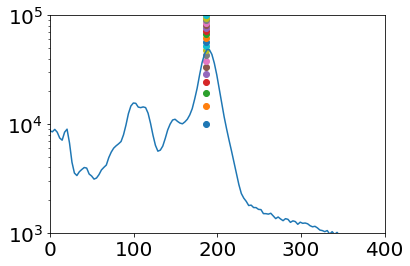

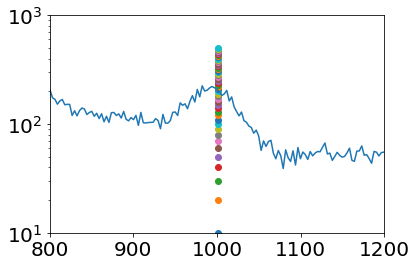

In [80]:
# tmp_spec = rebin_spectrum(spectrum,0,4.67,0)
tmp_spec = rebin_spectrum(spectrum, 15, 4.4, 0)

plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)

for thing in np.linspace(1e4,1e5,20):
    plt.scatter(186,thing)
plt.ylim([1e3,1e5])
plt.xlim(0,400)

plt.figure()
plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)
for thing in np.linspace(1e1,5e2,50):
    plt.scatter(1001,thing)
plt.ylim([1e1,1e3])
plt.xlim(800,1200)

          File NaI_spectra_uranium/UISO-91_HEU.CNF succesfully read!          
dnn-easy
0.9531336 +/- 0.0012030015 

cnn-easy
0.9515501 +/- 0.00015697085 

daednn-easy
0.68057126 +/- 0.024633743 

caednn-easy
0.84166986 +/- 0.0011701116 

dnn-full
0.9932149 +/- 9.045539e-06 

cnn-full
0.8568455 +/- 0.0014986928 

daednn-full
0.99662125 +/- 3.448667e-06 

caednn-full
0.91720265 +/- 4.2342912e-05 



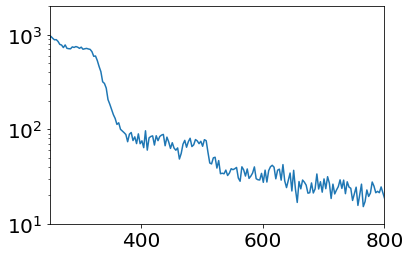

In [81]:
fileName = 'NaI_spectra_uranium/UISO-91_HEU.CNF'
true_enrichment = 0.914
    
data = read_cnf_file(fileName)

channels = data['Channels data']
energy = data['Energy']
spectrum = data['Channels data']

# plt.plot(energy, spectrum)
# plt.semilogy()


# tmp_spec = rebin_spectrum(spectrum,0,4.7,0)
tmp_spec = rebin_spectrum(spectrum, 15, 4.4, 0)
tmp_spec = rebin_spectrum(tmp_spec, *calibration)
plt.figure()
plt.plot(np.linspace(0,3e3,1024), tmp_spec)
plt.xlim(250,800)
plt.ylim(1e1,2e3)
plt.semilogy()

all_spectra[true_enrichment] = tmp_spec
for model_id in all_models:
    print(model_id)
    _, output = models_bagged(all_models,
                  model_id=model_id,
                  spectra=[scale*tmp_spec+addition])
    print(np.average(output),'+/-',np.var(output),'\n')
    all_outputs[model_id].append([true_enrichment, np.average(output), np.var(output)])

(500, 1500)

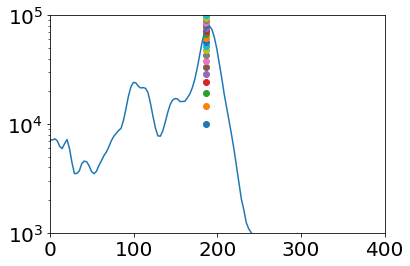

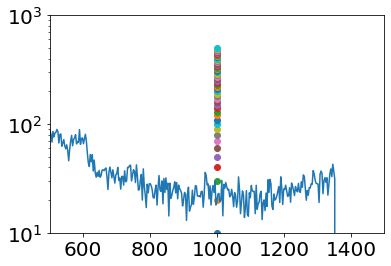

In [82]:
# tmp_spec = rebin_spectrum(spectrum,0,4.7,0)
tmp_spec = rebin_spectrum(spectrum, 15, 4.4, 0)
plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)
for thing in np.linspace(1e4,1e5,20):
    plt.scatter(186,thing)
plt.ylim([1e3,1e5])
plt.xlim(0,400)
plt.figure()
plt.semilogy(np.linspace(0,3e3,1024), tmp_spec)
for thing in np.linspace(1e1,5e2,50):
    plt.scatter(1001,thing)
plt.ylim([1e1,1e3])
plt.xlim(500,1500)

In [83]:
markers = ['*','*','s','s','x','x','^','^']
colors = ['purple', 'green', 'purple', 'green',
          'purple', 'green', 'purple', 'green',]

model_id_markers = {
    'cnn' : '*',
    'dnn' : 's',
    'caednn' : '^',
    'daednn' : 'x'
    }

mode_colors = {
    'easy' : 'green',
    'full' : 'purple',
}

markersizes = {
    'cnn' : 13,
    'dnn' : 10,
    'caednn' : '^',
    'daednn' : 'x'
}

Text(0, 0.5, 'Predicted Enrichment (%)')

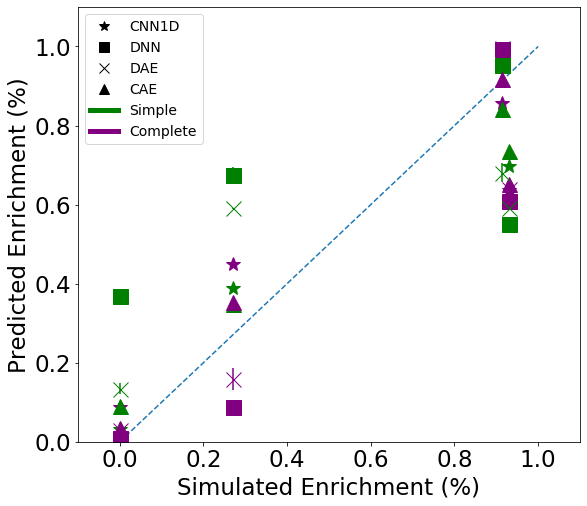

In [84]:
import matplotlib.lines as mlines
plt.figure(figsize=[9,8])
plt.rcParams.update({'font.size': 23})
plt.plot([0,1],[0,1], linestyle = '--') 

markersize = 15


for ml_model in ['cnn', 'dnn', 'caednn', 'daednn']:
    for mode in ['easy', 'full']:
        model_id = ml_model + '-' + mode 
        for output in all_outputs[model_id]:
            plt.errorbar(output[0],
                         output[1],
                         yerr=output[2],
                         marker=model_id_markers[ml_model],
                         color=mode_colors[mode],
                         markersize=markersize,)

plt.xlim([-0.1, 1.1])
plt.ylim([0, 1.1])


blue_star = mlines.Line2D([], [], marker='*', linestyle='None', color='k',
                          markersize=10, label='CNN1D')
red_square = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=10, label='DNN')
purple_triangle = mlines.Line2D([], [], color='k', marker='x', linestyle='None',
                          markersize=10, label='DAE')
green_cross = mlines.Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=10, label='CAE')
easy_setting = mlines.Line2D([], [], color='green', linestyle='-', linewidth=5,
                          markersize=10, label='Simple')
full_setting = mlines.Line2D([], [], color='purple', linestyle='-', linewidth=5,
                          markersize=10, label='Complete')

plt.legend(handles=[blue_star, red_square, purple_triangle, green_cross, easy_setting, full_setting], fontsize=14)
plt.xlabel('Simulated Enrichment (%)')
plt.ylabel('Predicted Enrichment (%)')
# plt.loglog()
# plt.xlim([0.0001,1])
# plt.ylim([0.0001,1])

(1, 100000.0)

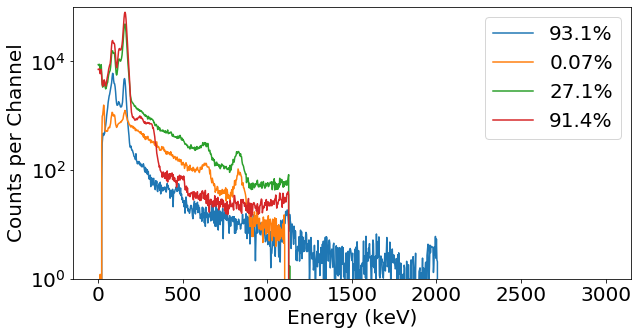

In [85]:
plt.figure(figsize=[10,5])
plt.rcParams.update({'font.size': 20})

for enrichment in all_spectra:
    plt.plot(np.linspace(0, 3e3, 1024), all_spectra[enrichment], label = str(round(enrichment*100, 2))+'%')

plt.semilogy()
plt.ylabel('Counts per Channel')
plt.xlabel('Energy (keV)')
plt.legend()
plt.ylim(1,1e5)
# plt.xlim(200,550)
